In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

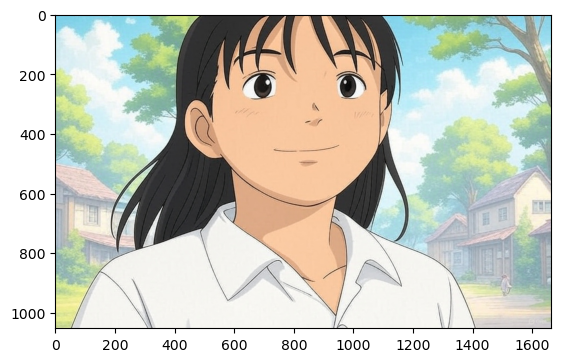

In [3]:
image = cv2.imread('img_1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [4]:
image_rgb.shape

(1052, 1664, 3)

In [6]:
rows, cols,_ = image_rgb.shape
input_points = np.float32([[50,50],[cols-50, 50],[50,rows-50],[cols-50,rows-50]])
output_points = np.float32([[100,100],[cols-100, 50],[100,rows-10],[cols-50,rows-100]])

''' 
Transformation matrix for perceptive transformation
3x3
a b c
d e f
g h 1

a b c : responsible for horizontal scaling, rotation and translation
d e f : responsible for vertical scaling, rotation and translation
g h : Perspective components account for depth and skewness of image
'''

M = cv2.getPerspectiveTransform(input_points,output_points)
print(M)

[[ 9.76491532e-01 -3.60916586e-03  5.13061636e+01]
 [-3.06460127e-02  9.51396332e-01  5.39127660e+01]
 [ 2.61480452e-05 -3.60916586e-05  1.00000000e+00]]


(-0.5, 1663.5, 1051.5, -0.5)

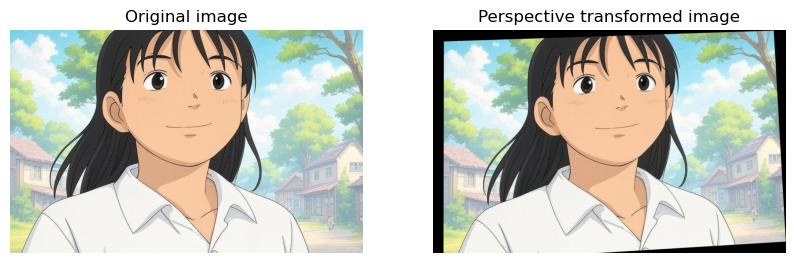

In [9]:
perspective_image = cv2.warpPerspective(image_rgb, M, (cols,rows))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title('Perspective transformed image')
plt.axis('off')

(-0.5, 1663.5, 1051.5, -0.5)

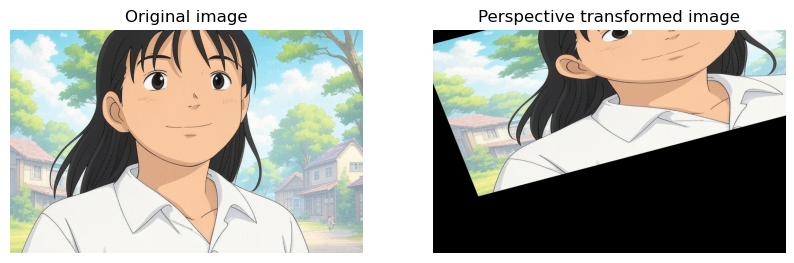

In [10]:
input_points = np.float32([[50,50],[200,50],[50,200]])
output_points = np.float32([[10,100],[200,50],[50,200]])

M = cv2.getAffineTransform(input_points,output_points)
affine_image = cv2.warpAffine(image_rgb, M, (cols,rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title('Perspective transformed image')
plt.axis('off')

## Rotation using Affine

(-0.5, 1663.5, 1051.5, -0.5)

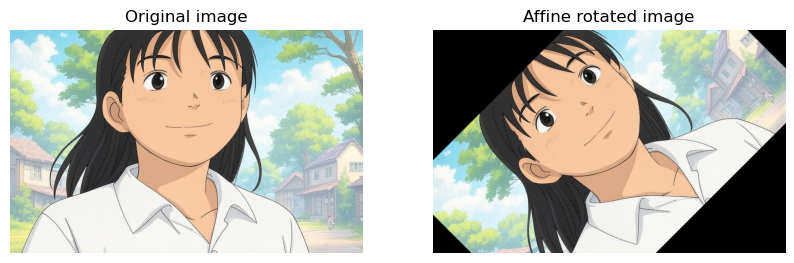

In [11]:
angle = 45
center = (cols//2, rows//2)
scale = 1.0 
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title('Affine rotated image')
plt.axis('off')


(-0.5, 2189.5, 1051.5, -0.5)

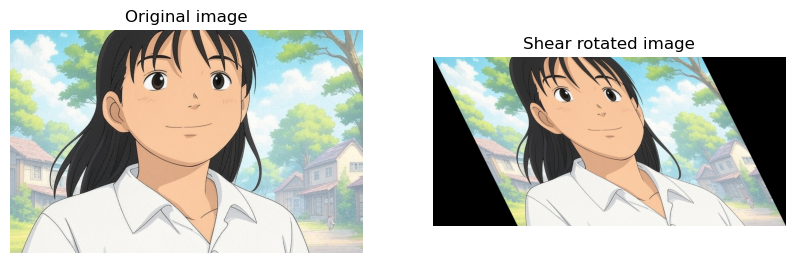

In [12]:
angle = 45
center = (cols//2, rows//2)
scale = 1.0 

shear_x , shear_y = 0.5, 0
M = np.float32([[1,shear_x,0],[shear_y,1,0]])

shear_image = cv2.warpAffine(image_rgb, M, (cols+int(shear_x*rows), rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(shear_image)
plt.title('Shear rotated image')
plt.axis('off')

### Translation

(-0.5, 1663.5, 1051.5, -0.5)

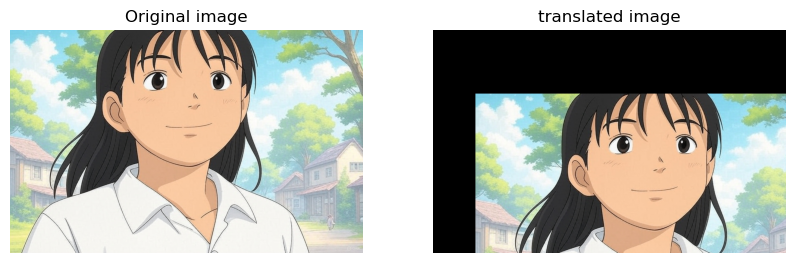

In [13]:
angle = 45
center = (cols//2, rows//2)
scale = 1.0 

tx, ty = 200, 300


M = np.float32([[1,0,tx],[0,1,ty]])

translated_image = cv2.warpAffine(image_rgb, M, (cols,rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title('translated image')
plt.axis('off')